In [59]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'who-is-the-real-winner:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F72632%2F8059709%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240412%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240412T215342Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4ad698092a6da6fbab246b36a0f06520afec56e564d207b91efc45f6def4832f9da49e3d4e48141113d028408fdc14e2803ff0a2b3b428d4cf119859999108f60103fd3a06bff92978be9f9fe2c9ffa63bff0bb5663751443b94072baa863b99e08dac72cbb07a93399a0856247743f790960e5363fb994cc072d86393f46062e7eb5ac4f213643dc52243dc7bd9d5a2b7d3f4c77e9e679081e151c873689b4d79ee00a88c7c2d288c9bbfb9bf31783dd10767c744e4c4e4b6ef85db2f6c0664bde9d6f6e74b6828cba0ff0d030d1d3d906e32383c3bb48183f43557bebe65d3b00f9f1fd092ae4584c858e050730a29e24705571df8ae05251d4aa1610c8125'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 89112 bytes downloaded
Downloaded and uncompressed: who-is-the-real-winner
Data source import complete.


---
# **Required Libraries**
The following libraries have been utilised:
* numpy
* pandas
* sklearn
---

In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Now both final_X and test_X have the same columns
# You can proceed with model training and testing

---
# Loading the Data:
The data is imported and loaded into respective data frames. The Target variable is then seperated from the dataframe into a new dataframe. We have also copied data into another dataframe for data analysis

---

In [61]:
train_data_path = '../input/who-is-the-real-winner/train.csv'
test_data_path = '../input/who-is-the-real-winner/test.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
data_analyse = train_data.copy()

y = train_data['Education']

#Data Analysis


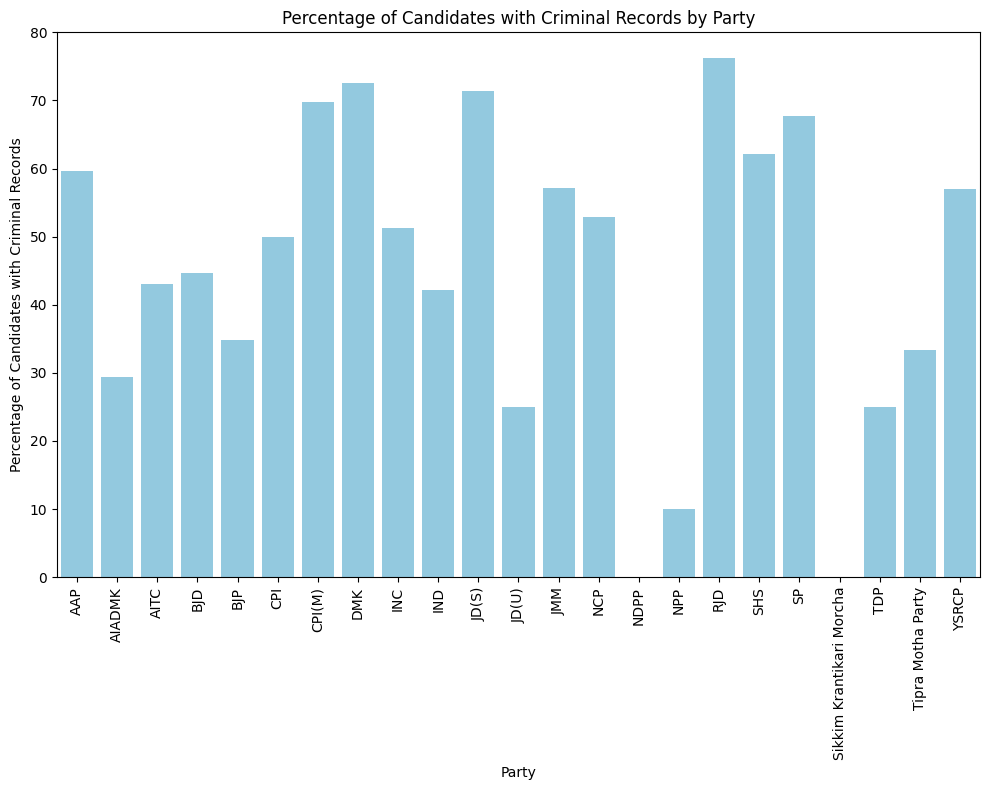

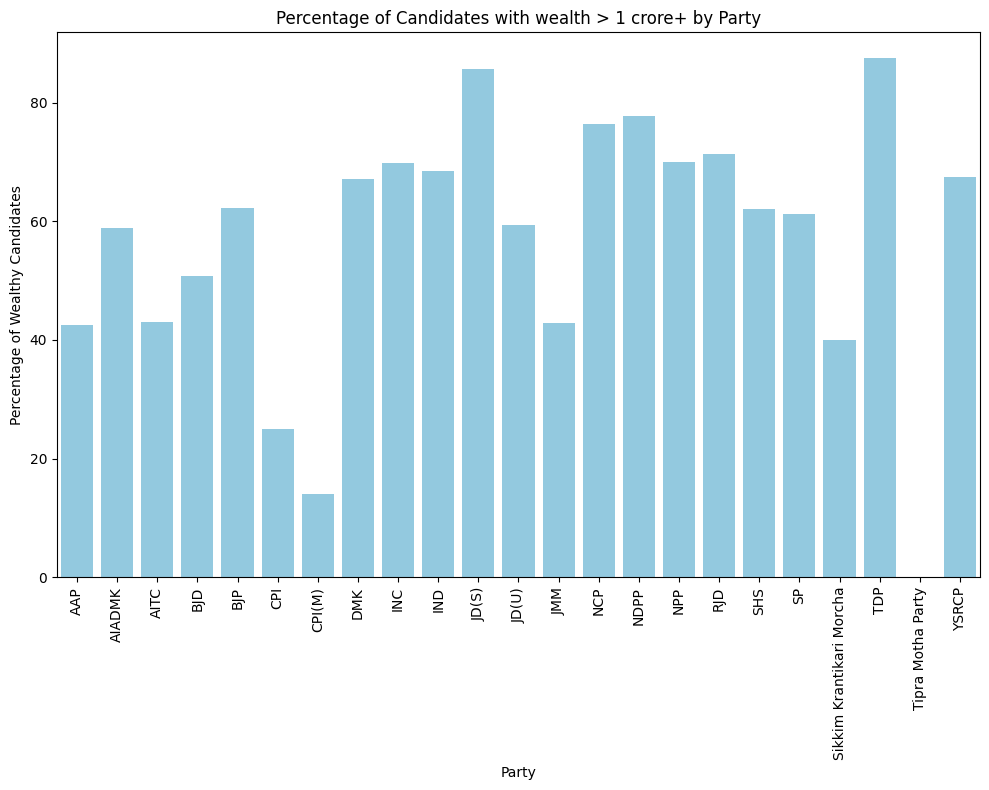

<ipython-input-62-6e782d713d52>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=data_analyse, palette='viridis')


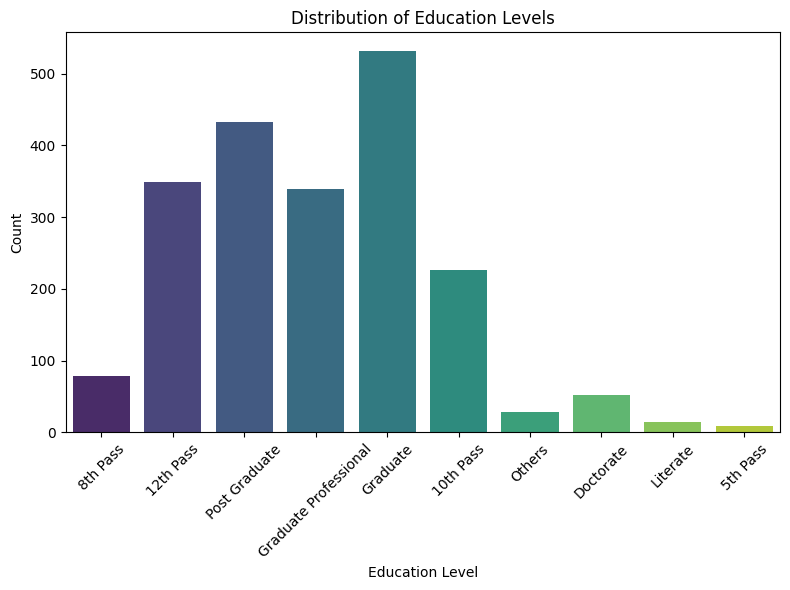

<ipython-input-62-6e782d713d52>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Criminal Case', data=data_analyse, palette='viridis')


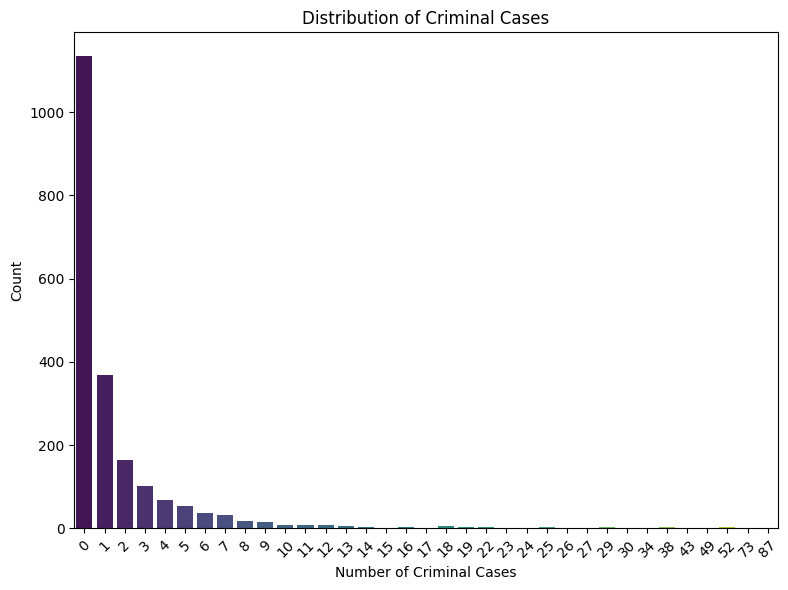

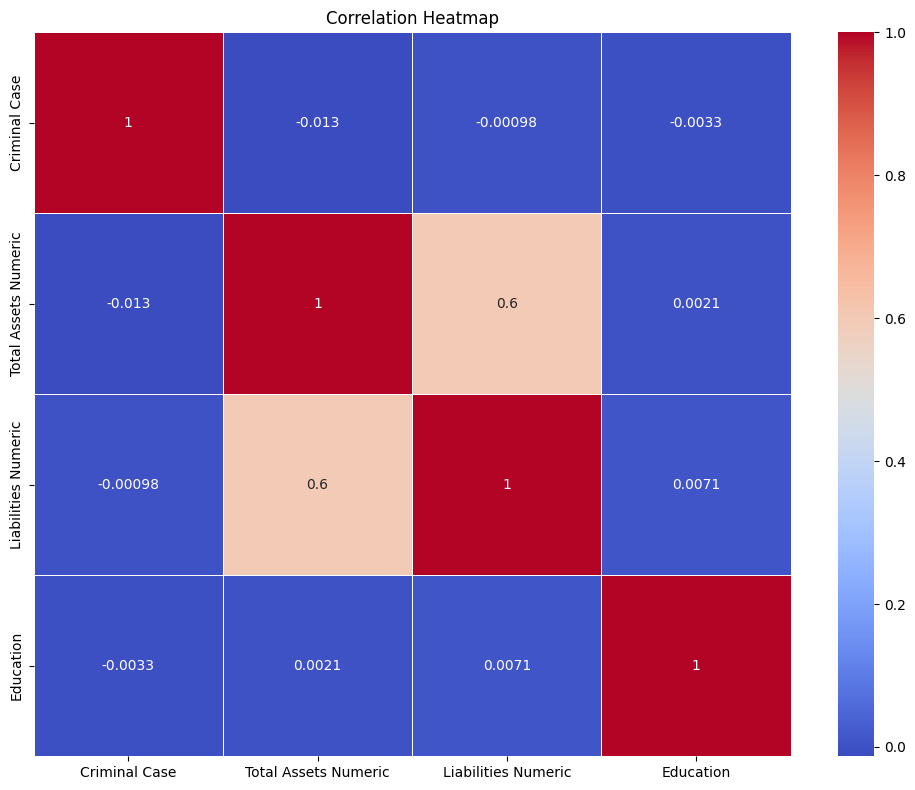

<ipython-input-62-6e782d713d52>:106: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Party', y='Education_percentage', hue='Education', data=education_percentage, palette='Set2', ci=None)


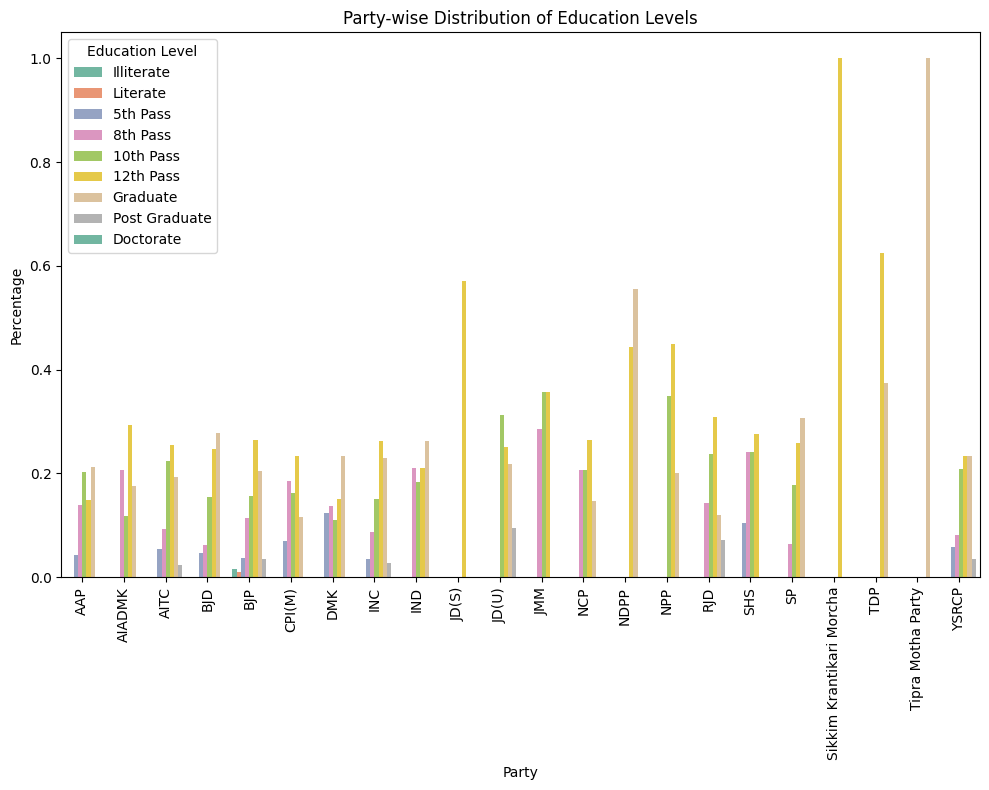

In [62]:
def numeric_seperator(value):
    if 'Crore' in value:
        return float(value.replace(' Crore+', '')) * 10000000
    elif 'Lac' in value:
        return float(value.replace(' Lac+', '')) * 100000
    elif 'Thou' in value:
        return float(value.replace(' Thou+', '')) * 1000
    elif 'Hund' in value:
        return float(value.replace(' Hund+', '')) * 100
    else:
        return float(value)

# Apply numeric_seperator function to 'Total Assets' and 'Liabilities' columns
data_analyse['Total Assets Numeric'] = data_analyse['Total Assets'].apply(numeric_seperator)
data_analyse['Liabilities Numeric'] = data_analyse['Liabilities'].apply(numeric_seperator)
# Mapping education levels to numerical values
education_mapping = {
    'Illiterate': 0,
    'Literate': 1,
    '5th Pass': 2,
    '8th Pass': 3,
    '10th Pass': 4,
    '12th Pass': 5,
    'Graduate': 6,
    'Post Graduate': 7,
    'Doctorate': 8
}

# Apply education mapping to 'Education' column

# Calculate the percentage of candidates with criminal records within each party
party_criminal_percentage = data_analyse.groupby('Party')['Criminal Case'].apply(lambda x: (x.astype(bool).sum() / len(x)) * 100)
party_criminal_percentage = party_criminal_percentage.reset_index(name='Percentage')
# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Party', y='Percentage', data=party_criminal_percentage, color='skyblue')
plt.title('Percentage of Candidates with Criminal Records by Party')
plt.xlabel('Party')
plt.ylabel('Percentage of Candidates with Criminal Records')
plt.xticks(rotation=90)
plt.tight_layout()
# Save plot
plt.savefig('party_criminal_records_distribution.png')  # Save the plot as an image file
plt.show()


# Calculate the percentage of candidates with wealth more than 1 crore plus within each party
wealthy_candidates_percentage = data_analyse[data_analyse['Total Assets Numeric'] > 10000000].groupby('Party').size() / data_analyse.groupby('Party').size() * 100
wealthy_candidates_percentage = wealthy_candidates_percentage.reset_index(name='Percentage')
# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Party', y='Percentage', data=wealthy_candidates_percentage, color='skyblue')
plt.title('Percentage of Candidates with wealth > 1 crore+ by Party')
plt.xlabel('Party')
plt.ylabel('Percentage of Wealthy Candidates')
plt.xticks(rotation=90)
plt.tight_layout()
# Save plot
plt.savefig('party_wealth_distribution.png')  # Save the plot as an image file
plt.show()


# Distribution of Education Levels
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=data_analyse, palette='viridis')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('education_distribution.png')  # Save the plot as an image file
plt.show()

# Distribution of Criminal Cases
plt.figure(figsize=(8, 6))
sns.countplot(x='Criminal Case', data=data_analyse, palette='viridis')
plt.title('Distribution of Criminal Cases')
plt.xlabel('Number of Criminal Cases')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('criminal_cases_distribution.png')  # Save the plot as an image file
plt.show()

data_analyse['Education'] = data_analyse['Education'].map(education_mapping)
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_analyse[['Criminal Case', 'Total Assets Numeric', 'Liabilities Numeric', 'Education']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')  # Save the plot as an image file
plt.show()


# Define education level labels
education_labels = [
    'Illiterate', 'Literate', '5th Pass', '8th Pass',
    '10th Pass', '12th Pass', 'Graduate', 'Post Graduate', 'Doctorate'
]
# Calculate the percentage of each education level for each party
education_percentage = data_analyse.groupby(['Party', 'Education']).size() / data_analyse.groupby('Party').size()
education_percentage = education_percentage.reset_index(name='Education_percentage')

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Party', y='Education_percentage', hue='Education', data=education_percentage, palette='Set2', ci=None)
plt.title('Party-wise Distribution of Education Levels')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()

# Customize legend
plt.legend(title='Education Level', labels=education_labels)

# Save plot
plt.savefig('party_education_distribution_percentage.png')  # Save the plot as an image file
plt.show()


---
# FUNCTIONS
 Various functions have been defined to efficiently pre-process data into a usable format. The encoders function similar to one hot encoders , selective one hot encoders to be precise. It is trivial that Doctors and Advocates would be more educated. Moreover , an interesting phenomenon was observed. Constituencies reserved for SCs and STs tended to have lesser educated Candidates. This points towards the highly unequal growth in our society.
<br>
The numeric_seperator converts the 'Total Liabilities' and 'Total Assets into their corresponding numeric values.

---

In [43]:

def Dr_Encoder(value):
    if 'Dr.' in value:
        return True
    else:
        return False

def Adv_Encoder(value):
    if 'Adv.' in value:
        return True
    else:
        return False
def SC_Encoder(value):
    if '(SC)' in value:
        return True
    else:
        return False

def ST_Encoder(value):
    if '(ST)' in value:
        return True
    else:
        return False
def Numeric_seperator(value):
    if 'Crore+' in value:
        return int(value.split()[0])*100000
    elif 'Lac+' in value:
        return int(value.split()[0])*1000
    elif 'Thou+' in value:
        return int(value.split()[0])*10
    elif 'Hund+' in value:
        return int(value.split()[0])*1
    else:
        return int(value)

---
# Feature Engineering
Data of 'Candidate' column is now encoded into 4 categories:


*   Dr(Doctor)
*   Adv(Advocate)
*   SC(Scheduled Castes)
*   SC(Scheduled Tribes) <br>
To whichever column the candidate belongs , that is marked as 'True' and  rest as 'False'(all are 0 if candidate belongs to none ) <br>
 **Note:** Total Liabilities and Total Assets are not being proceesed as they led to a decrease in f1 score.

---

In [44]:
train_data['Dr'] = train_data['Candidate'].apply(Dr_Encoder)
train_data['Adv'] = train_data['Candidate'].apply(Adv_Encoder)
test_data['Dr'] = test_data['Candidate'].apply(Dr_Encoder)
test_data['Adv'] = test_data['Candidate'].apply(Adv_Encoder)

train_data['SC'] = train_data['Constituency ∇'].apply(SC_Encoder)
train_data['ST'] = train_data['Constituency ∇'].apply(ST_Encoder)
test_data['SC'] = test_data['Constituency ∇'].apply(SC_Encoder)
test_data['ST'] = test_data['Constituency ∇'].apply(ST_Encoder)

# train_data['Total Assets Numeric'] = train_data['Total Assets'].apply(Numeric_seperator)
# train_data['Liabilities Numeric'] = train_data['Liabilities'].apply(Numeric_seperator)
# test_data['Total Assets Numeric'] = test_data['Total Assets'].apply(Numeric_seperator)
# test_data['Liabilities Numeric'] = test_data['Liabilities'].apply(Numeric_seperator)


---
# Data Processing(One Hot Encoding)
'columns_to_encode' contains the features to be one hot encoded.Note that for training the model efficiently , the teest data and the training data must have same number of features(columns). Therefore, only those features have been one hot encoded which have a fixed number of values because One Hot Encoding generates additional columns.
<br>
Unwanted and proceesed features are also removed. Note that post one hot encoding, we add collinear vectors(columns) , so we drop one column for each encoded feature.
<br> <br>
**Note:** This can be done because the dummy variables include redundant information supposed, we have 'n' number of categories, we will drop one new created column(dummy variable) and can use 'n−1' dummy variables. This will prevent the dummy variable trap.

---

In [47]:
columns_to_encode = ['Party', 'state']

# List to store the encoded DataFrames
encoded_dfs = []

# Iterate over each column and encode it
for column in columns_to_encode:
    encoded_df = pd.get_dummies(train_data[column])
    encoded_dfs.append(encoded_df)

# Concatenate all the encoded DataFrames
final_X = pd.concat([train_data] + encoded_dfs, axis='columns')

# Drop the columns not needed in the final DataFrame
final_X = final_X.drop(['ID', 'Education', 'Total Assets', 'Liabilities', 'Party', 'state',
                        'DMK', 'SIKKIM'], axis='columns')
# List to store the encoded DataFrames
encoded_dfs1 = []

# Iterate over each column and encode it
for column in columns_to_encode:
    encoded_df = pd.get_dummies(test_data[column])
    encoded_dfs1.append(encoded_df)

# Concatenate all the encoded DataFrames
test_X = pd.concat([test_data] + encoded_dfs1, axis='columns')

# Drop the columns not needed in the final DataFrame
test_X = test_X.drop(['ID', 'Total Assets', 'Liabilities', 'Party', 'state',
                      'DMK', 'SIKKIM'],axis='columns')

---
# Label Encoding
The code that has been commented out was meant to label encode the Candidate' and 'Constituency ∇' features. However, it was observed that training the model on Constituency and name data('Candidate') led to a decrease in f1 score. Therefore,  Candidate feature was selectively processed and encoded to achieve the f1 score as mentioned above.

---

In [22]:

# Create a copy of train_X to preserve the original DataFrame
train_X_encoded = final_X.copy()
# Initialize LabelEncoders for each column

label_encoder_candidate = LabelEncoder()
label_encoder_constituency = LabelEncoder()

# Fit and transform the 'Candidate' and 'Constituency ∇' columns
train_X_encoded['Candidate_encoded'] = label_encoder_candidate.fit_transform(train_X_encoded['Candidate'])
train_X_encoded['Constituency_encoded'] = label_encoder_constituency.fit_transform(train_X_encoded['Constituency ∇'])

# Now, train_X_encoded contains the original columns along with the encoded versions
# You can concatenate them to the original train_X DataFrame if desired
train_X_final = pd.concat([final_X, train_X_encoded[['Candidate_encoded']]], axis=1)

# Optionally, you may drop the original 'Candidate' and 'Constituency ∇' columns
train_X_final.drop(['Candidate', 'Constituency ∇'], axis='columns', inplace=True)



# Now, train_X_final contains the original columns along with the label encoded versions
# 'Candidate' and 'Constituency ∇' are dropped, and 'Candidate_encoded' and 'Constituency_encoded' are added

# Create a copy of test_X to preserve the original DataFrame
test_X_encoded = test_X.copy()

# Initialize LabelEncoders for each column
label_encoder_candidate_1 = LabelEncoder()
label_encoder_constituency_1 = LabelEncoder()

# Fit and transform the 'Candidate' and 'Constituency ∇' columns
test_X_encoded['Candidate_encoded'] = label_encoder_candidate_1.fit_transform(test_X_encoded['Candidate'])
test_X_encoded['Constituency_encoded'] = label_encoder_constituency_1.fit_transform(test_X_encoded['Constituency ∇'])

# Now, test_X_encoded contains the original columns along with the encoded versions
# You can concatenate them to the original test_X DataFrame if desired
test_X_final = pd.concat([test_X, test_X_encoded[['Candidate_encoded']]], axis=1)

# Optionally, you may drop the original 'Candidate' and 'Constituency ∇' columns
test_X_final.drop(['Candidate', 'Constituency ∇'], axis=1, inplace=True)


# Now, test_X_final contains the original columns along with the label encoded versions
# 'Candidate' and 'Constituency ∇' are dropped, and 'Candidate_encoded' and 'Constituency_encoded' are added
# Print number of columns of final datasets train_X_final and test_X_final to check consistency of data
print(len(train_X_final.columns))
print(len(test_X_final.columns))


---
# Data Processing
'Candidate', 'Constituency ∇' features have been dropped to efficiently train the model to achieve a better score


---



In [46]:
train_X_final = final_X.copy()
train_X_final.drop(['Candidate', 'Constituency ∇'], axis='columns', inplace=True)

# Now, train_X_final contains the original columns along with the label encoded versions
# 'Candidate' and 'Constituency ∇' are dropped, and 'Candidate_encoded' and 'Constituency_encoded' are added


test_X_final = test_X.copy()
test_X_final.drop(['Candidate', 'Constituency ∇'], axis=1, inplace=True)

# Now, test_X_final contains the original columns along with the label encoded versions
# 'Candidate' and 'Constituency ∇' are dropped, and 'Candidate_encoded' and 'Constituency_encoded' are added

# Print number of columns of final datasets train_X_final and test_X_final to check consistency of data
print(len(train_X_final.columns))
print(len(test_X_final.columns))

54
54


---
# Hyperparameter Tuning
The following code utilises GridSearchCV to estmiate the best parameters for RandomForestClassifier fitted with the given data. However, it was observed that this resulted in the overfitting of data and reduced scores when tested with test data.

---

In [38]:

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
a,a_1,b,b_1 = train_test_split(train_X_final, y, random_state = 1, test_size = 0.5)


model = RandomForestClassifier()
model.fit(a, b)

# predict the mode
y_pred = model.predict(a_1)

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(train_X_final, y)
print(grid_search.best_estimator_)
best = grid_search.best_estimator_

model_grid = RandomForestClassifier(max_depth= best.max_depth,
                                    max_features= best.max_features,
                                    max_leaf_nodes= best.max_leaf_nodes,
                                    n_estimators= best.n_estimators )
model_grid.fit(a, b)
y_pred_grid = model.predict(a_1)
print(f1_score(y_pred_grid,b_1, average = 'micro'))


---
# Optimization by Iteration
Since the Hyper Parameter Tuning was ineffective , we will just iterate over random_state and n_estimators to maximise f_1 *score*

---

In [37]:

a,a_1,b,b_1 = train_test_split(train_X_final, y, random_state = 1)
m = -1
x=0
# KNeighborsClassifier
# RandomForestClassifier

for i in range(0,120,1):
  emodel = RandomForestClassifier( random_state = i)
  emodel.fit(a,b)

  pred1 = emodel.predict(a_1)
  score = f1_score(pred1, b_1, average = 'weighted')
  if(score > m):
    x=i
  m = max(score,m)
print(x,m)
z =x
for i in range(1,120,1):
  emodel = RandomForestClassifier( random_state = z, n_estimators = i)
  emodel.fit(a,b)

  pred1 = emodel.predict(a_1)
  score = f1_score(pred1, b_1, average = 'weighted')
  if(score > m):
    x=i
  m = max(score,m)
print(x,m)


100 0.25595071473254777
64 0.2586861863885762


---
# Final Prediction
Now , we will predict the target for test data using the model with optimised parameters obtained above

---

In [36]:

a,a_1,b,b_1 = train_test_split(train_X_final, y, random_state = 1)
m = -1
x=0
# KNeighborsClassifier
# RandomForestClassifier

emodel = RandomForestClassifier( random_state = 100, n_estimators = 64)

emodel.fit(train_X_final,y)
pred = emodel.predict(test_X_final)



0.24137793095645732
2059


---
# Classification Report
---

In [ ]:
# Generate classification report
emodel = RandomForestClassifier( random_state = 100, n_estimators = 64)

emodel.fit(a,b)
pred1 = emodel.predict(a_1)
report = classification_report(pred1, b_1)

# Convert report to DataFrame
report_df = pd.DataFrame([x.split() for x in report.split('\n')[2:-3]], columns=['class', 'precision', 'recall', 'f1-score', 'support'])

# Convert DataFrame to LaTeX
latex_code = report_df.to_latex(index=False)

print(latex_code)

---
# Storing Predicted **Data**
Saving the data to a csv file

---

In [ ]:

df = pd.DataFrame({'Education':pred})
df["ID"] = df.index
df.set_index("ID")

df.to_csv('submission8.csv',encoding = 'utf-8',index = False)
